In [1]:
#Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Dataset
train1 = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#train = pd.merge(train1, test)
frames = [train1, test]
train = pd.concat(frames)

In [4]:
#training dataset 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#info of training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


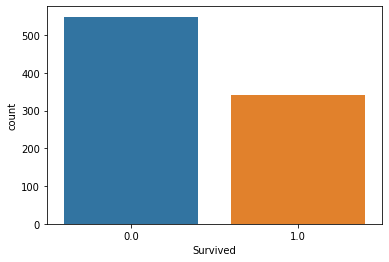

In [6]:
# Survival count comparison
sns.countplot(x ="Survived", data = train)

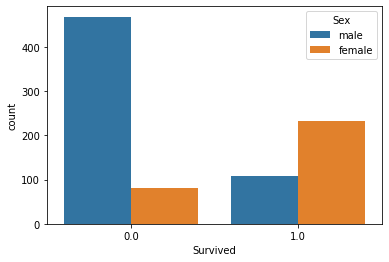

In [7]:
#Sex comparison in survival count
sns.countplot(x ="Survived",hue ="Sex", data = train)

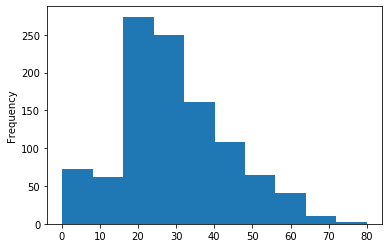

In [8]:
#Age comparison among passengers
train["Age"].plot.hist()

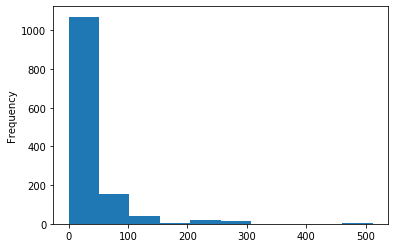

In [9]:
#Fare Comparison
train["Fare"].plot.hist()

In [10]:
#Dropping columns
train.drop(['Name','Ticket','Cabin'],axis = 1,inplace = True)

In [11]:
# droping all nan values
train.dropna(inplace=True)

In [12]:
#Turning embarked elements into quantitative variable
embarked =pd.get_dummies(train['Embarked'], drop_first = True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [13]:
#Turning embarked elements into quantitative variable
pcl =pd.get_dummies(train['Pclass'], drop_first = True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [14]:
#Turning Sex elements into quantitative variable
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
#Concatenating quantized dummy variables
train = pd.concat([train,embarked,pcl,sex],axis = 1)

In [16]:
#Modified training dataset
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S,2,3,male
0,1,0.0,3,male,22.0,1,0,7.2500,S,0,1,0,1,1
1,2,1.0,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,S,0,1,0,1,0
3,4,1.0,1,female,35.0,1,0,53.1000,S,0,1,0,0,0
4,5,0.0,3,male,35.0,0,0,8.0500,S,0,1,0,1,1


In [17]:
train.drop(['Embarked','Pclass','Sex'],axis = 1,inplace = True)

In [18]:
#Filling NaN elements with mean
train.fillna(train.mean(), inplace=True)

In [19]:
#Assigning input and output variables
X = train.drop(['Survived','PassengerId'],axis = 1)
y = train['Survived']

In [20]:
#Splitting training dataset into training and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=123)

In [21]:
#Using Gradient Boost Classifier
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [22]:
#Predicting output
y_pred = clf.predict(X_valid)

In [23]:
#Classification Report
report = classification_report(y_valid,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       136
         1.0       0.86      0.71      0.78        99

    accuracy                           0.83       235
   macro avg       0.84      0.81      0.82       235
weighted avg       0.83      0.83      0.83       235



In [24]:
#Accuracy score for Gradient Boost Classifier
accuracy_score(y_valid,y_pred)

0.8297872340425532

In [25]:
#test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
#test dataset info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
sex1 = pd.get_dummies(test['Sex'], drop_first = True)

In [28]:
#Modifications in test dataset
embarked1 = pd.get_dummies(test['Embarked'], drop_first = True)
pcl1 = pd.get_dummies(test['Pclass'], drop_first = True)

In [29]:
test = pd.concat([test,embarked1,pcl1,sex1], axis = 1)

In [30]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket','Pclass','Cabin'], axis=1,inplace=True)

In [31]:
#Filling test variables
test.fillna(test.mean(), inplace=True)

In [32]:
# Modified test dataset
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Q,S,2,3,male
0,892,34.5,0,0,7.8292,1,0,0,1,1
1,893,47.0,1,0,7.0000,0,1,0,1,0
2,894,62.0,0,0,9.6875,1,0,1,0,1
3,895,27.0,0,0,8.6625,0,1,0,1,1
4,896,22.0,1,1,12.2875,0,1,0,1,0


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Q            418 non-null    uint8  
 6   S            418 non-null    uint8  
 7   2            418 non-null    uint8  
 8   3            418 non-null    uint8  
 9   male         418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [34]:
# submit your predictions in csv format
ids = test['PassengerId']
predictions = clf.predict(test.drop('PassengerId', axis=1))


In [35]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)